# TP 1 Análisis de Series Temporales
Lijtmaer - Gaddi - Brusasca - Duran - Palavecino

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf
import matplotlib
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import statsmodels.tsa.stattools as tsa
import statsmodels.api as sm
from scipy.stats import chi2
import warnings
warnings.filterwarnings('ignore')

In [22]:
ticker_nvda = ['NVDA']
ticker_amd = ['AMD']
ticker_intel = ['INTC']

nvda_data = yf.download(ticker_nvda, start='2023-01-01', end='2025-01-04')
amd_data = yf.download(ticker_amd, start='2023-01-01', end='2025-01-04')
intel_data = yf.download(ticker_intel, start='2023-01-01', end='2025-01-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [23]:
# Fecha como indice
nvda_data.index = pd.to_datetime(nvda_data.index)
amd_data.index = pd.to_datetime(amd_data.index)
intel_data.index = pd.to_datetime(intel_data.index)

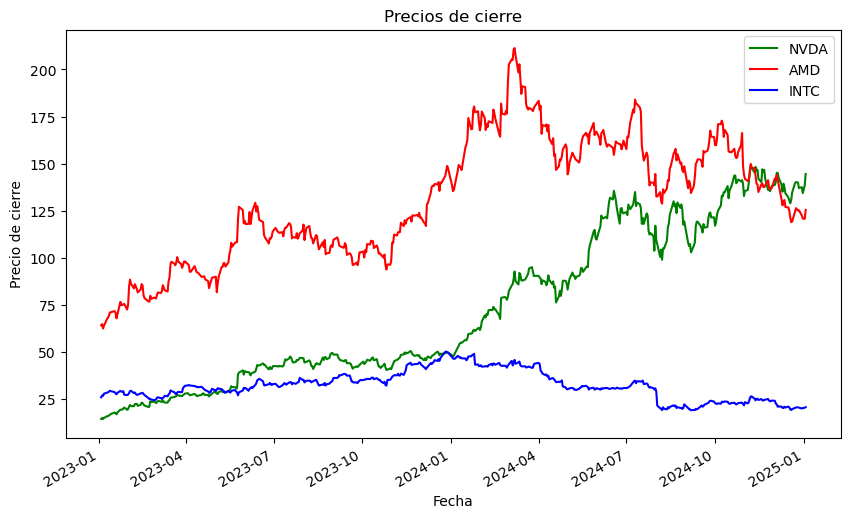

In [24]:
# Gráfico de precios de cierre

nvda_data[('Close', 'NVDA')].plot(title='NVDA Closing Prices', figsize=(10, 6), color = 'green')
amd_data[('Close', 'AMD')].plot(title='AMD Closing Prices', figsize=(10, 6), color = 'red')
intel_data[('Close', 'INTC')].plot(title='INTC Closing Prices', figsize=(10, 6), color = 'blue')

plt.title('Precios de cierre')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.legend(['NVDA', 'AMD', 'INTC'])
plt.show()

A simple vista, NVDA y AMD no aparentan ser estacionarias, Intel por otro lado aparenta cierta estabilidad en el tiempo

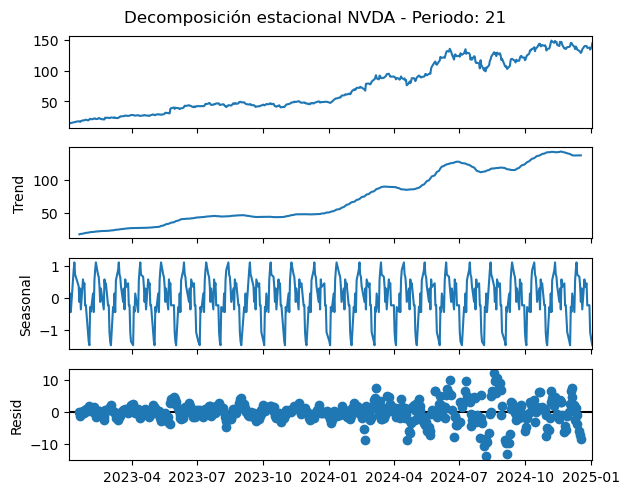

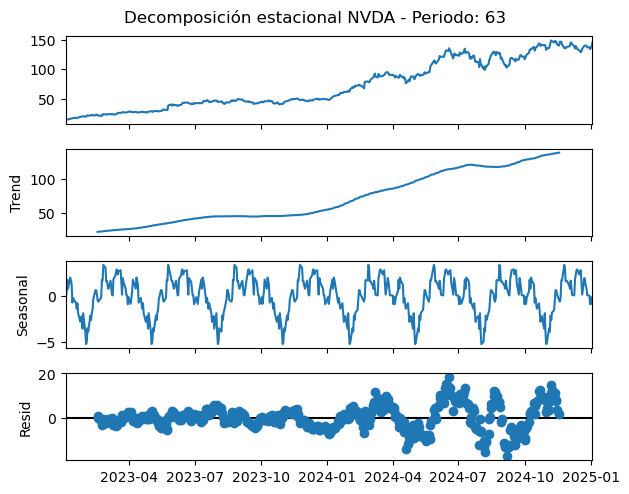

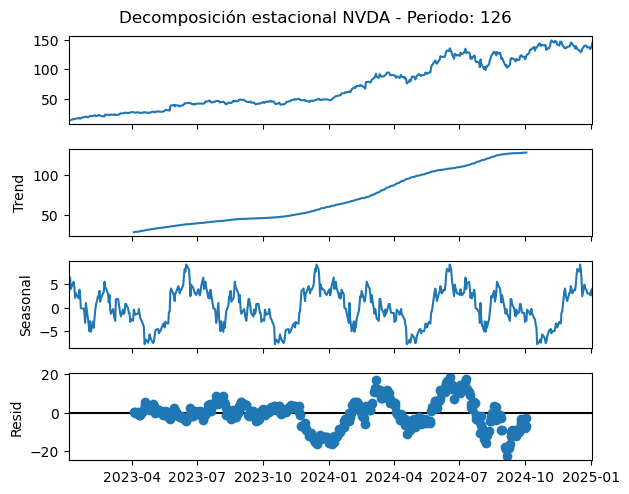

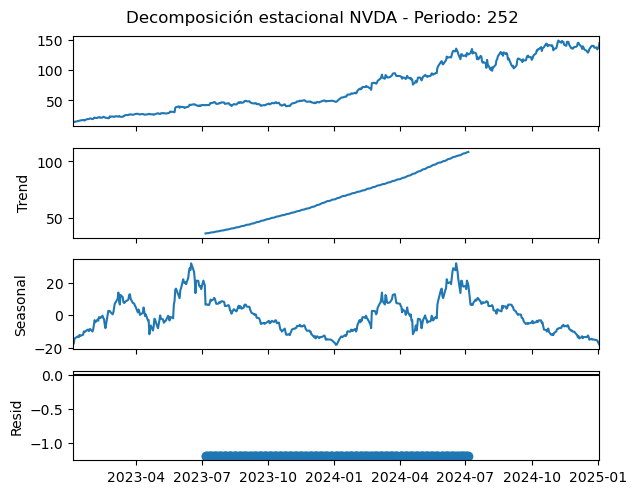

In [25]:
# Descomposicion estacional NVDA
for p in [21, 63, 126, 252]:
    decomposicion_nvda = seasonal_decompose(nvda_data[('Close')], model='additive', period=p)
    ax = decomposicion_nvda.plot()
    ax.suptitle(f'Decomposición estacional NVDA - Periodo: {p}', y=1.02)
    plt.show()

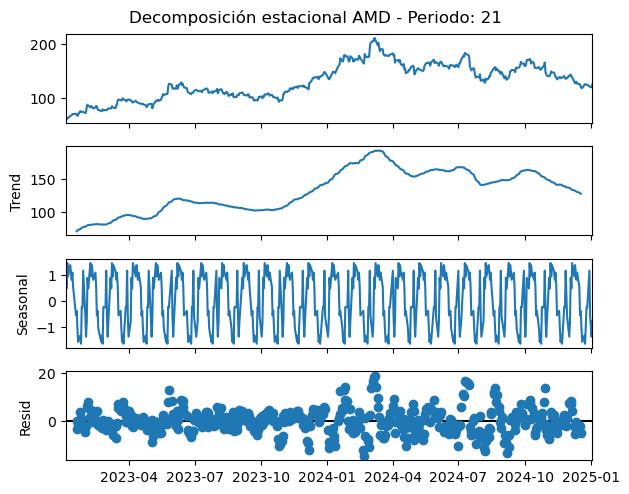

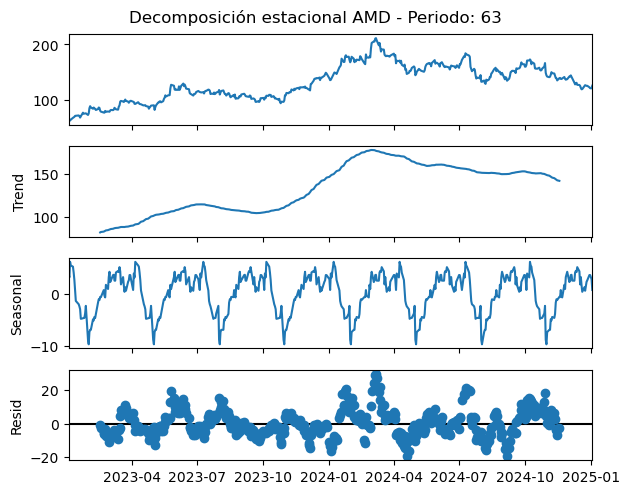

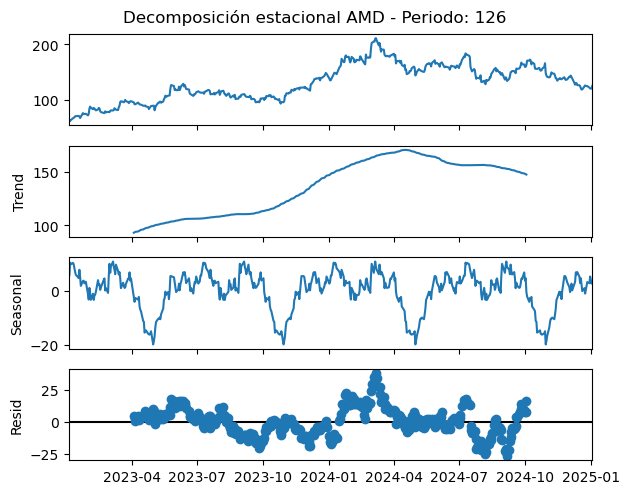

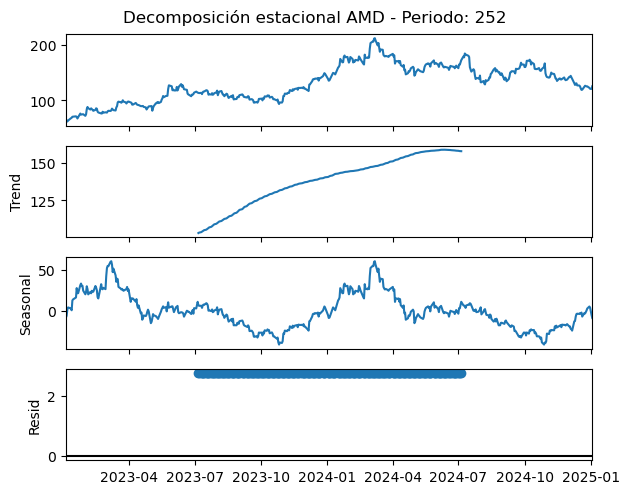

In [26]:
# Descomposicion estacional AMD
for p in [21, 63, 126, 252]:
    decomposicion_amd = seasonal_decompose(amd_data[('Close')], model='additive', period=p)
    ax = decomposicion_amd.plot()
    ax.suptitle(f'Decomposición estacional AMD - Periodo: {p}', y=1.02)
    plt.show()

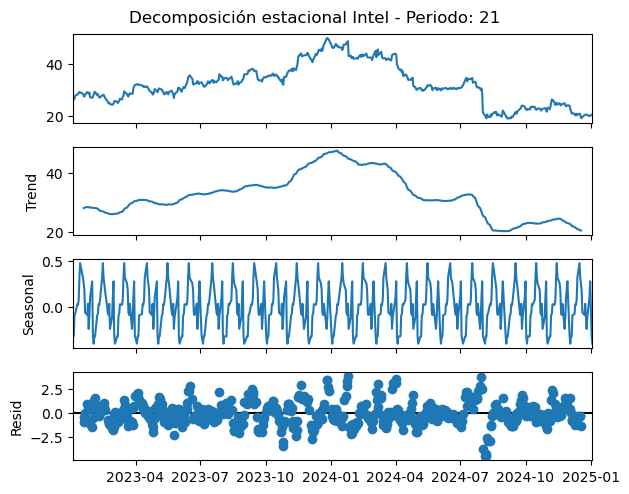

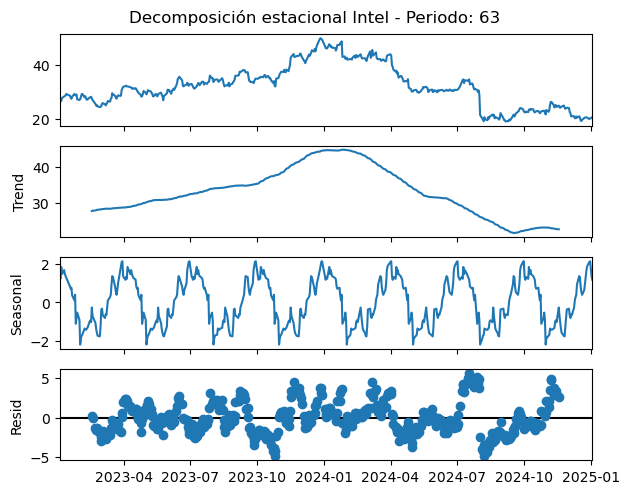

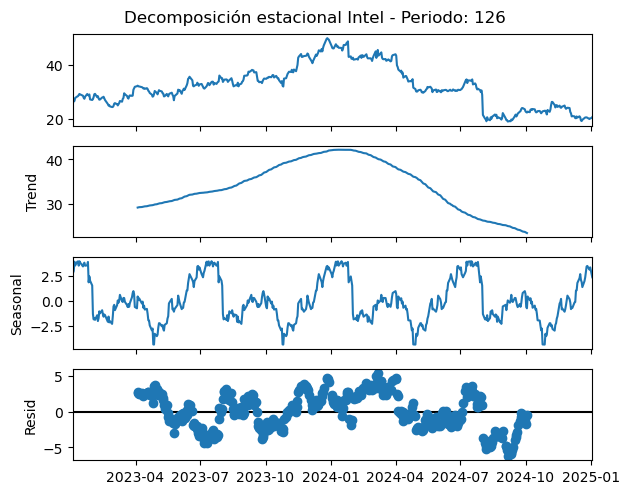

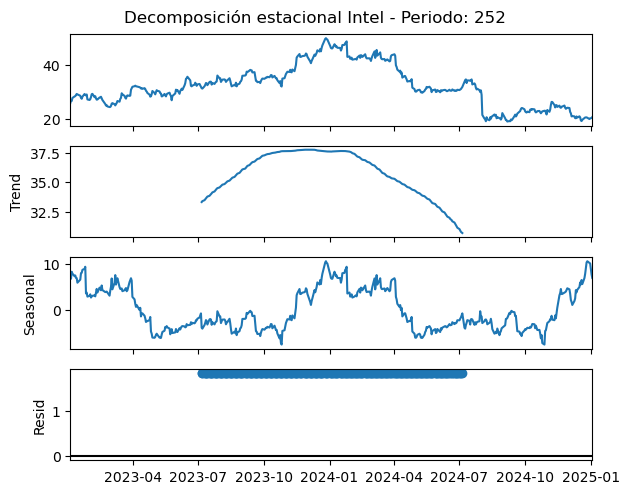

In [27]:
# Descomposicion estacional Intel
for p in [21, 63, 126, 252]:
    decomposicion_intel = seasonal_decompose(intel_data[('Close')], model='additive', period=p)
    ax = decomposicion_intel.plot()
    ax.suptitle(f'Decomposición estacional Intel - Periodo: {p}', y=1.02)
    plt.show()

### FAS, FAC, FACP

In [28]:
nvda_close = nvda_data[('Close')]
amd_close = amd_data[('Close')]
intel_close = intel_data[('Close')]

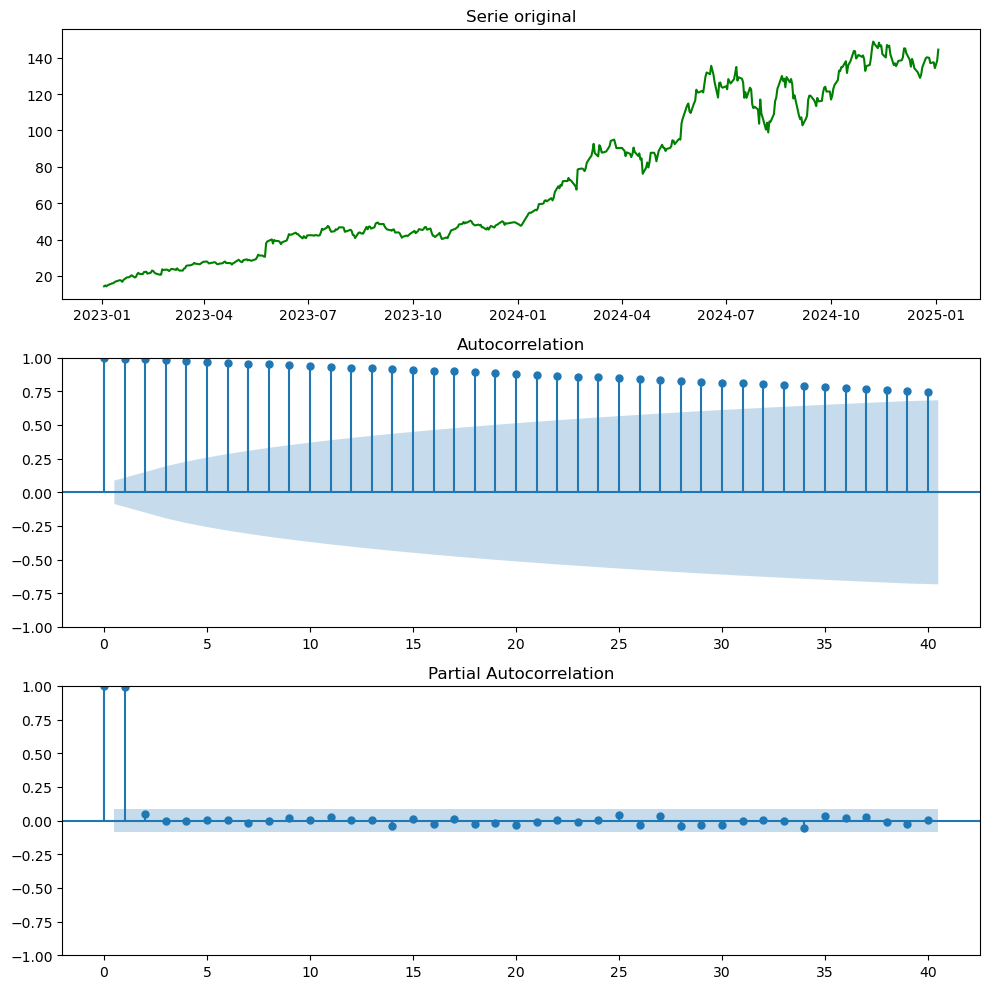

In [29]:
fig, axes = plt.subplots(3,1, figsize=(10,10))
axes[0].plot(nvda_close, color='green')
axes[0].set_title("Serie original")
plot_acf(nvda_close, ax=axes[1], lags=40)
plot_pacf(nvda_close, ax=axes[2], lags=40, method='ywm')
plt.tight_layout()
plt.show()

Analizando los graficos de FAC y FACP se infiere que la serie de NVDA es no estacionaria

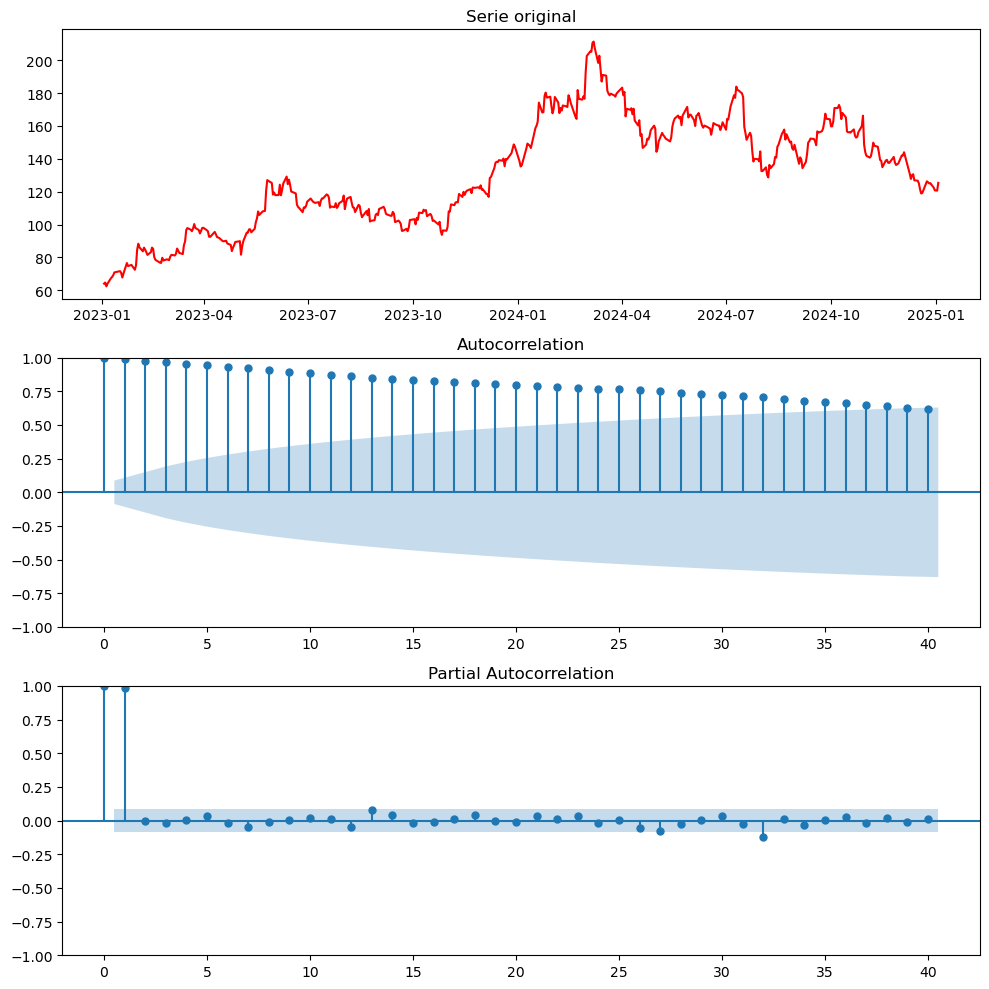

In [30]:
fig, axes = plt.subplots(3,1, figsize=(10,10))
axes[0].plot(amd_close, color='red')
axes[0].set_title("Serie original")
plot_acf(amd_close, ax=axes[1], lags=40)
plot_pacf(amd_close, ax=axes[2], lags=40, method='ywm')
plt.tight_layout()
plt.show()

Analizando los graficos de FAC y FACP se infiere que la serie de AMD es no estacionaria

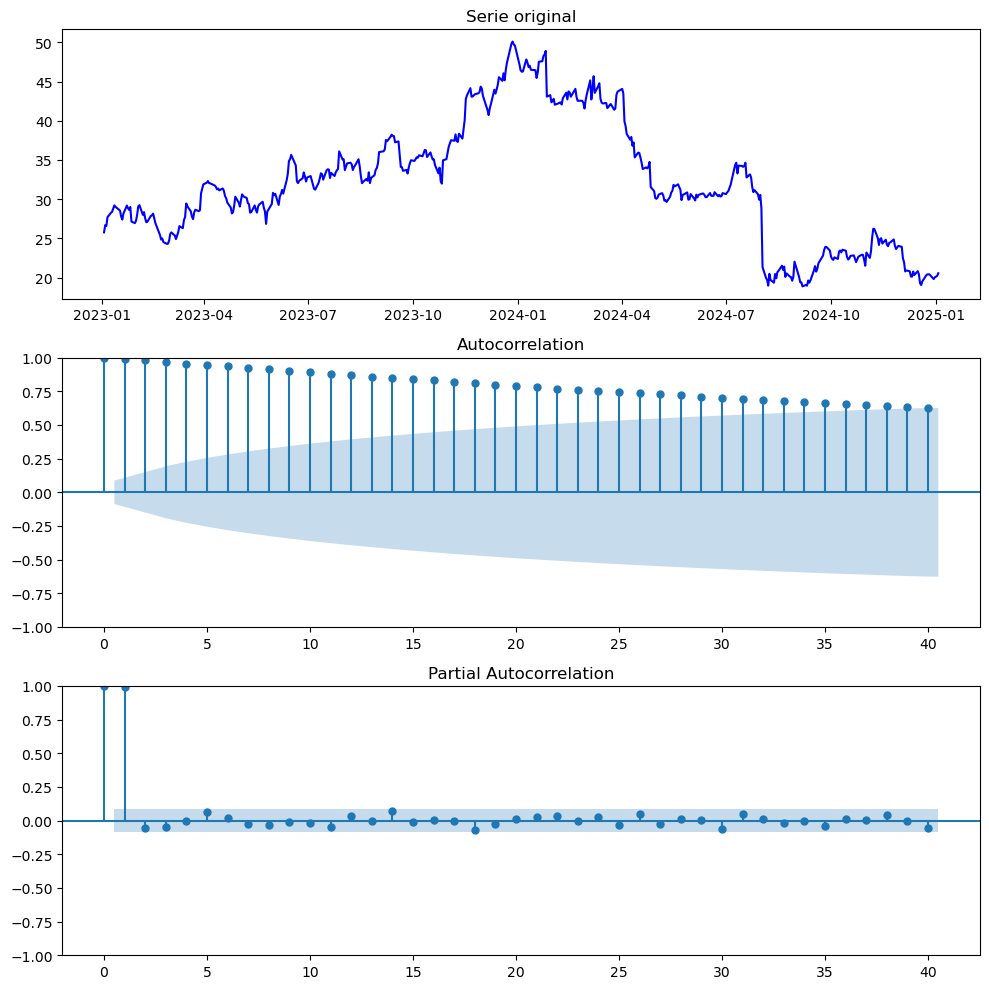

In [31]:
fig, axes = plt.subplots(3,1, figsize=(10,10))
axes[0].plot(intel_close, color='blue')
axes[0].set_title("Serie original")
plot_acf(intel_close, ax=axes[1], lags=40)
plot_pacf(intel_close, ax=axes[2], lags=40, method='ywm')
plt.tight_layout()
plt.show()

Analizando los graficos de FAC y FACP se infiere que la serie de Intel es no estacionaria

## Pruebas de raiz unitaria

### Dickey fuller

In [32]:
def adf_test(timeseries):
    result = tsa.adfuller(timeseries, autolag='AIC')
    print(f"\n--- ADF Test para la serie: {timeseries.columns[0][1]} ---")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("La serie es estacionaria (rechazamos H0)")
    else:
        print("La serie NO es estacionaria (no rechazamos H0)")

In [33]:
adf_test(nvda_close)
adf_test(amd_close)
adf_test(intel_close)


--- ADF Test para la serie: V ---
ADF Statistic: -0.09163257757748594
p-value: 0.950265609809155
La serie NO es estacionaria (no rechazamos H0)

--- ADF Test para la serie: M ---
ADF Statistic: -2.1332476054791423
p-value: 0.23135737524552846
La serie NO es estacionaria (no rechazamos H0)

--- ADF Test para la serie: N ---
ADF Statistic: -1.1297360696609557
p-value: 0.7030690311997287
La serie NO es estacionaria (no rechazamos H0)


### KPSS

In [34]:
def kpss_test(timeseries):
    statistic, p_value, _, _ = tsa.kpss(timeseries, regression='c')
    print(f"\n--- KPSS Test para la serie: {timeseries.columns[0][1]} ---")
    print(f"Statistic: {statistic}")
    print(f"p-value: {p_value}")
    if p_value > 0.05:
        print("La serie es estacionaria (no rechazamos H0)")
    else:
        print("La serie NO es estacionaria (rechazamos H0)")

In [35]:
kpss_test(nvda_close)
kpss_test(amd_close)
kpss_test(intel_close)


--- KPSS Test para la serie: V ---
Statistic: 3.5222700231807584
p-value: 0.01
La serie NO es estacionaria (rechazamos H0)

--- KPSS Test para la serie: M ---
Statistic: 2.6089893284940473
p-value: 0.01
La serie NO es estacionaria (rechazamos H0)

--- KPSS Test para la serie: N ---
Statistic: 1.0476811134739399
p-value: 0.01
La serie NO es estacionaria (rechazamos H0)


Test KPSS y ADF indican que las series son no estacionarias

## Testeo SARIMA con distintos parametros

In [36]:
nvda_train, nvda_test = train_test_split(nvda_close, train_size=0.8)
amd_train, amd_test = train_test_split(amd_close, train_size=0.8)
intel_train, intel_test = train_test_split(intel_close, train_size=0.8)

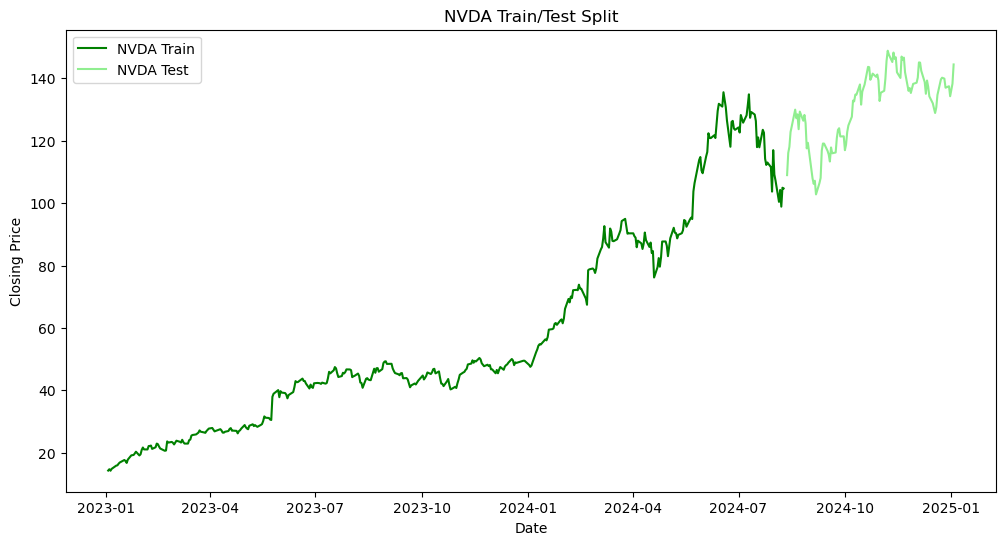

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(nvda_train, label='NVDA Train', color='green')
plt.plot(nvda_test, label='NVDA Test', color='lightgreen')
plt.title('NVDA Train/Test Split')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend();

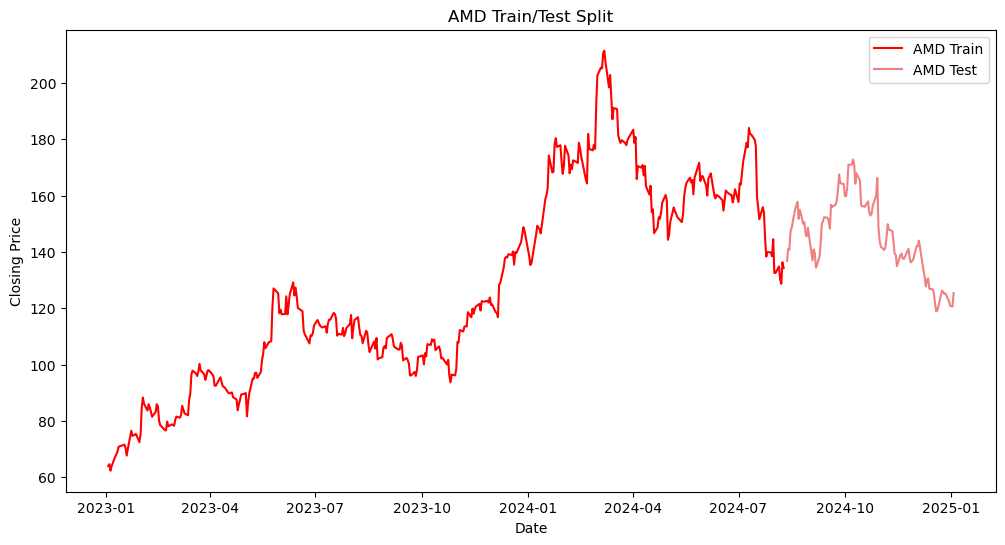

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(amd_train, label='AMD Train', color='red')
plt.plot(amd_test, label='AMD Test', color='lightcoral')
plt.title('AMD Train/Test Split')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend();

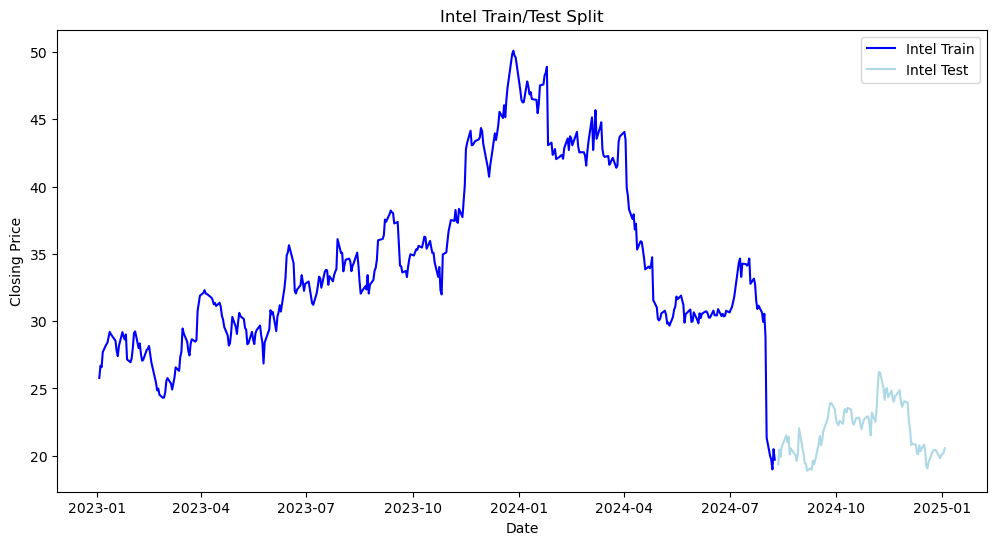

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(intel_train, label='Intel Train', color='blue')
plt.plot(intel_test, label='Intel Test', color='lightblue')
plt.title('Intel Train/Test Split')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend();

# Testeo SARIMA

In [40]:
model_auto_nvda = pm.auto_arima(
    nvda_train,
    start_p=0, start_q=0,
    max_p=3, max_q=3,
    start_P=0, start_Q=0,
    max_P=2, max_Q=2,
    m=21,              
    seasonal=True,
    d=None, D=None,    
    trace=True,       
    error_action="ignore",  
    suppress_warnings=True,
    stepwise=True,     
    information_criterion='aic'
)

print(model_auto_nvda.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[21] intercept   : AIC=1808.178, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[21] intercept   : AIC=1798.415, Time=0.47 sec
 ARIMA(0,1,1)(0,0,1)[21] intercept   : AIC=1796.963, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[21]             : AIC=1810.064, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[21] intercept   : AIC=1800.778, Time=0.02 sec
 ARIMA(0,1,1)(1,0,1)[21] intercept   : AIC=1798.117, Time=0.91 sec
 ARIMA(0,1,1)(0,0,2)[21] intercept   : AIC=1796.525, Time=3.20 sec
 ARIMA(0,1,1)(1,0,2)[21] intercept   : AIC=1794.074, Time=7.20 sec
 ARIMA(0,1,1)(2,0,2)[21] intercept   : AIC=1795.702, Time=15.04 sec
 ARIMA(0,1,1)(2,0,1)[21] intercept   : AIC=1793.855, Time=7.06 sec
 ARIMA(0,1,1)(2,0,0)[21] intercept   : AIC=1794.586, Time=2.90 sec
 ARIMA(0,1,1)(1,0,0)[21] intercept   : AIC=1798.153, Time=0.37 sec
 ARIMA(0,1,0)(2,0,1)[21] intercept   : AIC=1802.906, Time=6.33 sec
 ARIMA(1,1,1)(2,0,1)[21] intercept   : AIC=1791.145, Time=18.18 sec
 ARIMA(1,1,1)(1,0

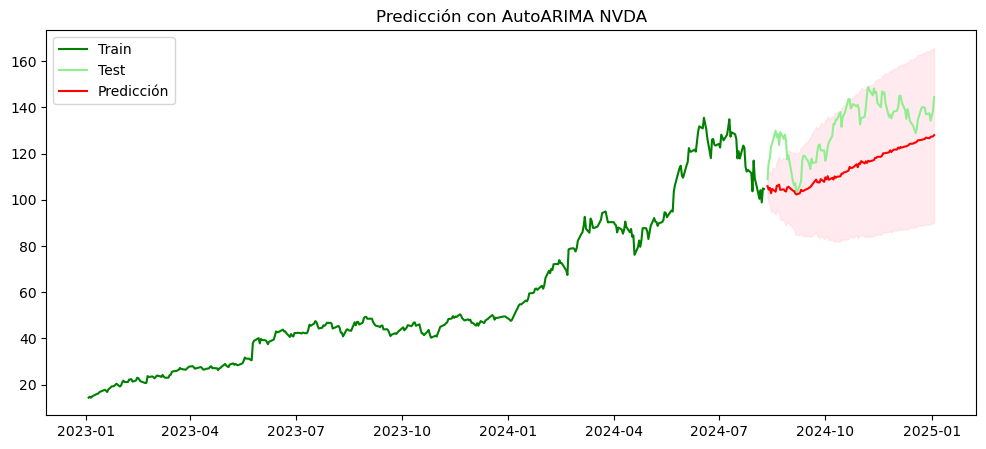

In [41]:
# Prediccion NVDA SARIMA
n_periods = len(nvda_test)
forecast, confint = model_auto_nvda.predict(n_periods=n_periods, return_conf_int=True)

plt.figure(figsize=(12,5))
plt.plot(nvda_train, label="Train", color='green')
plt.plot(nvda_test, label="Test", color='lightgreen')
plt.plot(nvda_test.index, forecast, label="Predicción", color="red")
plt.fill_between(nvda_test.index, confint[:,0], confint[:,1], color="pink", alpha=0.3)
plt.title('Predicción con AutoARIMA NVDA')
plt.legend()
plt.show();

In [42]:
model_auto_amd = pm.auto_arima(
    amd_train,
    start_p=0, start_q=0,
    max_p=3, max_q=3,
    start_P=0, start_Q=0,
    max_P=2, max_Q=2,
    m=21,              
    seasonal=True,
    d=None, D=None,    
    trace=True,       
    error_action="ignore",  
    suppress_warnings=True,
    stepwise=True,     
    information_criterion='aic'
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[21] intercept   : AIC=2263.623, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[21] intercept   : AIC=2266.799, Time=0.59 sec
 ARIMA(0,1,1)(0,0,1)[21] intercept   : AIC=2266.664, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[21]             : AIC=2262.382, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[21] intercept   : AIC=2264.823, Time=0.39 sec
 ARIMA(0,1,0)(0,0,1)[21] intercept   : AIC=2264.686, Time=0.39 sec
 ARIMA(0,1,0)(1,0,1)[21] intercept   : AIC=2265.731, Time=0.81 sec
 ARIMA(1,1,0)(0,0,0)[21] intercept   : AIC=2265.579, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[21] intercept   : AIC=2265.578, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[21] intercept   : AIC=2267.531, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[21]          
Total fit time: 2.853 seconds


In [43]:
print(model_auto_amd.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  403
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1130.191
Date:                Fri, 05 Sep 2025   AIC                           2262.382
Time:                        14:19:03   BIC                           2266.378
Sample:                             0   HQIC                          2263.964
                                - 403                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        16.1992      0.714     22.703      0.000      14.801      17.598
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               166.34
Prob(Q):                              0.83   Pr

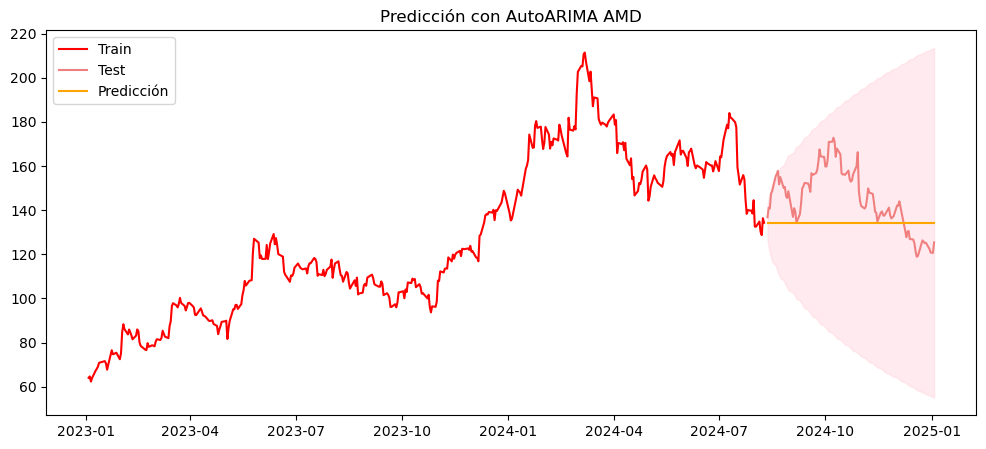

In [44]:
# Prediccion AMD SARIMA
n_periods = len(amd_test)
forecast, confint = model_auto_amd.predict(n_periods=n_periods, return_conf_int=True)

plt.figure(figsize=(12,5))
plt.plot(amd_train, label="Train", color='red')
plt.plot(amd_test, label="Test", color='lightcoral')
plt.plot(amd_test.index, forecast, label="Predicción", color="orange")
plt.fill_between(amd_test.index, confint[:,0], confint[:,1], color="pink", alpha=0.3)
plt.title('Predicción con AutoARIMA AMD')
plt.legend()
plt.show();

In [45]:
model_auto_intel = pm.auto_arima(
    intel_train,
    start_p=0, start_q=0,
    max_p=3, max_q=3,
    start_P=0, start_Q=0,
    max_P=2, max_Q=2,
    m=21,              
    seasonal=True,
    d=None, D=None,    
    trace=True,       
    error_action="ignore",  
    suppress_warnings=True,
    stepwise=True,     
    information_criterion='aic'
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[21] intercept   : AIC=1105.821, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[21] intercept   : AIC=1103.609, Time=0.43 sec
 ARIMA(0,1,1)(0,0,1)[21] intercept   : AIC=1103.283, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[21]             : AIC=1103.922, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[21] intercept   : AIC=1105.149, Time=0.03 sec
 ARIMA(0,1,1)(1,0,1)[21] intercept   : AIC=1104.806, Time=0.90 sec
 ARIMA(0,1,1)(0,0,2)[21] intercept   : AIC=1103.835, Time=3.49 sec
 ARIMA(0,1,1)(1,0,0)[21] intercept   : AIC=1103.936, Time=0.38 sec
 ARIMA(0,1,1)(1,0,2)[21] intercept   : AIC=1104.858, Time=6.89 sec
 ARIMA(0,1,0)(0,0,1)[21] intercept   : AIC=1104.169, Time=0.32 sec
 ARIMA(1,1,1)(0,0,1)[21] intercept   : AIC=1104.195, Time=1.02 sec
 ARIMA(0,1,2)(0,0,1)[21] intercept   : AIC=1103.734, Time=0.59 sec
 ARIMA(1,1,0)(0,0,1)[21] intercept   : AIC=1102.958, Time=0.44 sec
 ARIMA(1,1,0)(0,0,0)[21] intercept   : AIC=1104.807, Time=0.02 sec
 ARIMA(1,1,0)(1,0,1

In [46]:
print(model_auto_intel.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  403
Model:             SARIMAX(1, 1, 0)x(0, 0, [1], 21)   Log Likelihood                -547.514
Date:                              Fri, 05 Sep 2025   AIC                           1101.029
Time:                                      14:19:38   BIC                           1113.018
Sample:                                           0   HQIC                          1105.776
                                              - 403                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0896      0.050      1.777      0.076      -0.009       0.188
ma.S.L21      -0.11

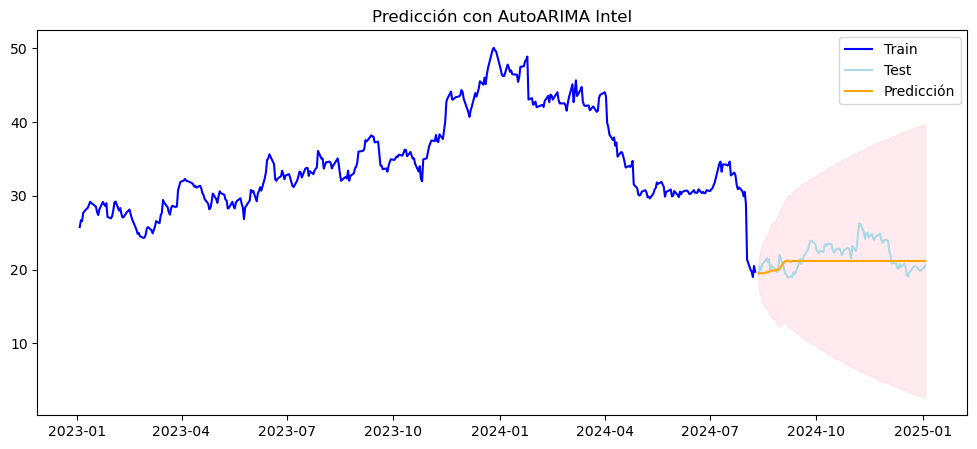

In [47]:
# Prediccion Intel SARIMA
n_periods = len(intel_test)
forecast, confint = model_auto_intel.predict(n_periods=n_periods, return_conf_int=True)

plt.figure(figsize=(12,5))
plt.plot(intel_train, label="Train", color='blue')
plt.plot(intel_test, label="Test", color='lightblue')
plt.plot(intel_test.index, forecast, label="Predicción", color="orange")
plt.fill_between(intel_test.index, confint[:,0], confint[:,1], color="pink", alpha=0.3)
plt.title('Predicción con AutoARIMA Intel')
plt.legend()
plt.show();